## Gram-Schmidt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.patches import Polygon

In [4]:
def gram_schmidt_visualization(A):
    """Visualize the Gram-Schmidt process for a 2x2 matrix A with improved label positioning."""
    a1 = A[:, 0]  # First column of A
    a2 = A[:, 1]  # Second column of A
    
    # Step 1: Normalize a1 to get q1
    q1 = a1 / np.linalg.norm(a1)
    
    # Step 2: Make a2 orthogonal to q1 and normalize to get q2
    projection = np.dot(a2, q1) * q1
    v2 = a2 - projection
    q2 = v2 / np.linalg.norm(v2)
    
    # Calculate R matrix
    r11 = np.dot(q1, a1)
    r12 = np.dot(q1, a2)
    r22 = np.dot(q2, a2)
    R = np.array([[r11, r12], [0, r22]])
    
    Q = np.column_stack((q1, q2))
    
    # Create the visualization with a custom style
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axs = plt.subplots(2, 2, figsize=(14, 12), dpi=100)
    fig.suptitle('Gram-Schmidt Process Visualization', fontsize=20, y=0.98)
    
    # Set consistent axis limits based on vectors
    max_val = max(np.max(np.abs(A)), 2) * 1.2  # Add some padding
    
    for ax in axs.flat:
        ax.set_xlim(-max_val, max_val)
        ax.set_ylim(-max_val, max_val)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=1)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3, linewidth=1)
        ax.set_aspect('equal')
        # Add unit circle for reference
        circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.5)
        ax.add_artist(circle)
    
    # Plot 1: Original matrix columns
    axs[0, 0].set_title('Original Matrix Columns', fontsize=16, pad=10)
    plot_vectors(axs[0, 0], [a1, a2], ['crimson', 'royalblue'], linewidth=3)
    
    # Calculate better label positions based on vector directions
    a1_label_pos = a1 * 1.15  # Slightly further out
    a2_label_pos = a2 * 1.15
    
    axs[0, 0].text(a1_label_pos[0], a1_label_pos[1], r'$\mathbf{a}_1$', 
                  fontsize=16, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))
    axs[0, 0].text(a2_label_pos[0], a2_label_pos[1], r'$\mathbf{a}_2$', 
                  fontsize=16, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))
    
    # Plot 2: First step - normalize a1 to get q1
    axs[0, 1].set_title('Step 1: Normalize First Vector', fontsize=16, pad=10)
    plot_vectors(axs[0, 1], [a1], ['crimson'], linewidth=3)
    plot_vectors(axs[0, 1], [q1], ['forestgreen'], linewidth=3)
    
    # Add a line connecting the tips of a1 and q1
    if np.linalg.norm(a1) > 1:
        axs[0, 1].plot([a1[0], q1[0]], [a1[1], q1[1]], 'k--', alpha=0.5)
    
    axs[0, 1].text(a1_label_pos[0], a1_label_pos[1], r'$\mathbf{a}_1$', 
                  fontsize=16, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))
    
    # Position q1 label optimally
    q1_norm = np.linalg.norm(q1)
    q1_label_pos = q1 * 1.5  # Further out for formula
    
    axs[0, 1].text(q1_label_pos[0], q1_label_pos[1], r'$\mathbf{q}_1 = \frac{\mathbf{a}_1}{||\mathbf{a}_1||}$', 
                  fontsize=16, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=3))
    
    # Plot 3: Second step - make a2 orthogonal to q1
    axs[1, 0].set_title('Step 2: Make Second Vector Orthogonal', fontsize=16, pad=10)
    plot_vectors(axs[1, 0], [a2], ['royalblue'], linewidth=3)
    plot_vectors(axs[1, 0], [q1], ['forestgreen'], linewidth=3, alpha=0.7)
    plot_vectors(axs[1, 0], [projection], ['gold'], linewidth=3)
    plot_vectors(axs[1, 0], [v2], ['purple'], linewidth=3)
    
    # Add dashed lines to show the projection
    axs[1, 0].plot([a2[0], projection[0]], [a2[1], projection[1]], 'k--', alpha=0.5)
    axs[1, 0].plot([projection[0], v2[0]], [projection[1], v2[1]], 'k--', alpha=0.5)
    
    # Add right angle marker at the projection point
    if np.linalg.norm(projection) > 0.1 and np.linalg.norm(v2) > 0.1:
        right_angle_size = min(np.linalg.norm(projection), np.linalg.norm(v2)) * 0.2
        # Calculate unit vectors
        proj_unit = projection / np.linalg.norm(projection)
        v2_unit = v2 / np.linalg.norm(v2)
        # Create right angle marker points
        p1 = projection
        p2 = projection + right_angle_size * proj_unit
        p3 = projection + right_angle_size * (proj_unit + v2_unit)
        p4 = projection + right_angle_size * v2_unit
        right_angle = Polygon([p1, p2, p3, p4], closed=True, fill=True, 
                              color='gray', alpha=0.3)
        axs[1, 0].add_patch(right_angle)
    
    # Position labels better for this complex plot
    axs[1, 0].text(a2[0] * 1.15, a2[1] * 1.15, r'$\mathbf{a}_2$', 
                  fontsize=16, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))
    
    # q1 label position
    q1_unit = q1 / np.linalg.norm(q1)
    q1_label_pos = q1 + q1_unit * 0.3  # Offset in direction of vector
    axs[1, 0].text(q1_label_pos[0], q1_label_pos[1], r'$\mathbf{q}_1$', 
                  fontsize=16, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))
    
    # Projection label - position to the side of the projection vector
    proj_perp = np.array([-projection[1], projection[0]])  # Perpendicular to projection
    if np.linalg.norm(proj_perp) > 0:
        proj_perp = proj_perp / np.linalg.norm(proj_perp) * 0.3  # Normalize and scale
    
    # Decide which side to place the label based on the vectors
    proj_side = -1 if np.dot(proj_perp, v2) < 0 else 1
    proj_label_pos = projection/2 + proj_side * proj_perp  # Place label to the side
    
    axs[1, 0].text(proj_label_pos[0], proj_label_pos[1], r'$\text{proj}_{\mathbf{q}_1}\mathbf{a}_2$', 
                  fontsize=14, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=2))
    
    # v2 label - we want this well away from the vector
    v2_unit = v2 / np.linalg.norm(v2)
    v2_perp = np.array([-v2[1], v2[0]])  # Perpendicular to v2
    if np.linalg.norm(v2_perp) > 0:
        v2_perp = v2_perp / np.linalg.norm(v2_perp) * 0.5  # Normalize and scale
    
    # Place the label below the vector
    v2_label_pos = v2/2 - v2_perp  # Offset perpendicular to the vector
    
    axs[1, 0].text(v2_label_pos[0], v2_label_pos[1], r'$\mathbf{v}_2 = \mathbf{a}_2 - \text{proj}_{\mathbf{q}_1}\mathbf{a}_2$', 
                  fontsize=14, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.9, edgecolor='lightgray', pad=3))
    
    # Plot 4: Final orthonormal basis
    axs[1, 1].set_title('Final Orthonormal Basis (Q)', fontsize=16, pad=10)
    plot_vectors(axs[1, 1], [q1, q2], ['forestgreen', 'purple'], linewidth=3)
    
    # Add arc to show orthogonality
    radius = 0.5
    theta1 = np.arctan2(q1[1], q1[0]) * 180 / np.pi
    theta2 = np.arctan2(q2[1], q2[0]) * 180 / np.pi
    
    # Make sure we use the smaller angle
    angle_diff = (theta2 - theta1) % 360
    if angle_diff > 180:
        theta_start, theta_end = theta2, theta1 + 360
    else:
        theta_start, theta_end = theta1, theta2
        
    arc = plt.matplotlib.patches.Arc((0, 0), radius*2, radius*2, 
                                    theta1=theta_start, theta2=theta_end, 
                                    color='gray', alpha=0.5)
    axs[1, 1].add_patch(arc)
    
    # Add dot product = 0 text - position this between the vectors but not too close
    mid_angle_rad = (theta_start + theta_end) / 2 * np.pi / 180
    dot_prod_pos = np.array([np.cos(mid_angle_rad), np.sin(mid_angle_rad)]) * 0.7
    
    axs[1, 1].text(dot_prod_pos[0], dot_prod_pos[1], r'$\mathbf{q}_1 \cdot \mathbf{q}_2 = 0$', 
                  fontsize=12, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))
    
    # Position labels for q1 and q2 better
    q1_offset = 1.5 if abs(q1[0]) > abs(q1[1]) else 1.7  # Adjust based on vector orientation
    q1_label_pos = q1 * q1_offset
    
    q2_offset = 1.5 if abs(q2[0]) > abs(q2[1]) else 1.7
    q2_label_pos = q2 * q2_offset
    
    axs[1, 1].text(q1_label_pos[0], q1_label_pos[1], r'$\mathbf{q}_1$', 
                  fontsize=16, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))
    
    # For q2 we need to position the formula nicely
    q2_formula_pos = q2 * (q2_offset + 0.3)  # Slightly further out for the formula
    
    axs[1, 1].text(q2_formula_pos[0], q2_formula_pos[1], r'$\mathbf{q}_2 = \frac{\mathbf{v}_2}{||\mathbf{v}_2||}$', 
                  fontsize=16, ha='center', va='center',
                  bbox=dict(facecolor='white', alpha=0.9, edgecolor='lightgray', pad=3))
    
    # Add QR decomposition formula
    fig.text(0.5, 0.02, r'$\mathbf{A} = \mathbf{Q}\mathbf{R}$ where $\mathbf{Q}$ is orthogonal and $\mathbf{R}$ is upper triangular', 
             fontsize=16, ha='center')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Print the Q and R matrices with better formatting
    print("Original Matrix A:")
    print(np.round(A, 4))
    print("\nOrthogonal Matrix Q:")
    print(np.round(Q, 4))
    print("\nUpper Triangular Matrix R:")
    print(np.round(R, 4))
    print("\nVerification A = QR:")
    print(np.round(np.matmul(Q, R), 4))
    print("\nVerification Q^T Q = I (orthogonality):")
    print(np.round(np.matmul(Q.T, Q), 4))
    
    return fig, Q, R

def plot_vectors(ax, vectors, colors, alpha=1, linewidth=2, labels=None, zorder=3, head_width=0.1, head_length=0.2):
    """
    Plot vectors as arrows starting from the origin.
    
    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The axes to plot on
    vectors : list of numpy arrays
        List of vectors to plot
    colors : list of str
        List of colors for each vector
    alpha : float, optional
        Transparency of the vectors (default: 1)
    linewidth : float, optional
        Width of the arrow lines (default: 2)
    labels : list of str, optional
        Labels for each vector (default: None)
    zorder : int, optional
        Drawing order for the arrows (default: 3)
    head_width : float, optional
        Width of the arrow head (default: 0.1)
    head_length : float, optional
        Length of the arrow head (default: 0.2)
    
    Returns:
    --------
    arrows : list
        List of FancyArrowPatch objects representing the vectors
    """
    arrows = []
    for i, (v, c) in enumerate(zip(vectors, colors)):
        # Skip zero vectors
        if np.allclose(v, 0):
            continue
            
        # Create arrow
        arrow = FancyArrowPatch(
            (0, 0), v, 
            color=c, 
            alpha=alpha,
            arrowstyle=f'-|>, head_width={head_width}, head_length={head_length}', 
            linewidth=linewidth,
            zorder=zorder
        )
        ax.add_patch(arrow)
        arrows.append(arrow)
        
        # Add label if provided
        if labels is not None and i < len(labels):
            # Position label slightly away from the arrow tip
            norm = np.linalg.norm(v)
            if norm > 0:
                # Calculate position for label (slightly offset from arrow tip)
                offset = 0.1 * v / norm
                label_pos = v + offset
                
                # Add the label with a small white background for better visibility
                label = ax.text(
                    label_pos[0], label_pos[1], 
                    labels[i],
                    fontsize=12,
                    ha='center', 
                    va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2),
                    zorder=zorder+1
                )
    
    return arrows


Original Matrix A:
[[1 1]
 [1 0]]

Orthogonal Matrix Q:
[[ 0.7071  0.7071]
 [ 0.7071 -0.7071]]

Upper Triangular Matrix R:
[[1.4142 0.7071]
 [0.     0.7071]]

Verification A = QR:
[[ 1.  1.]
 [ 1. -0.]]

Verification Q^T Q = I (orthogonality):
[[1. 0.]
 [0. 1.]]


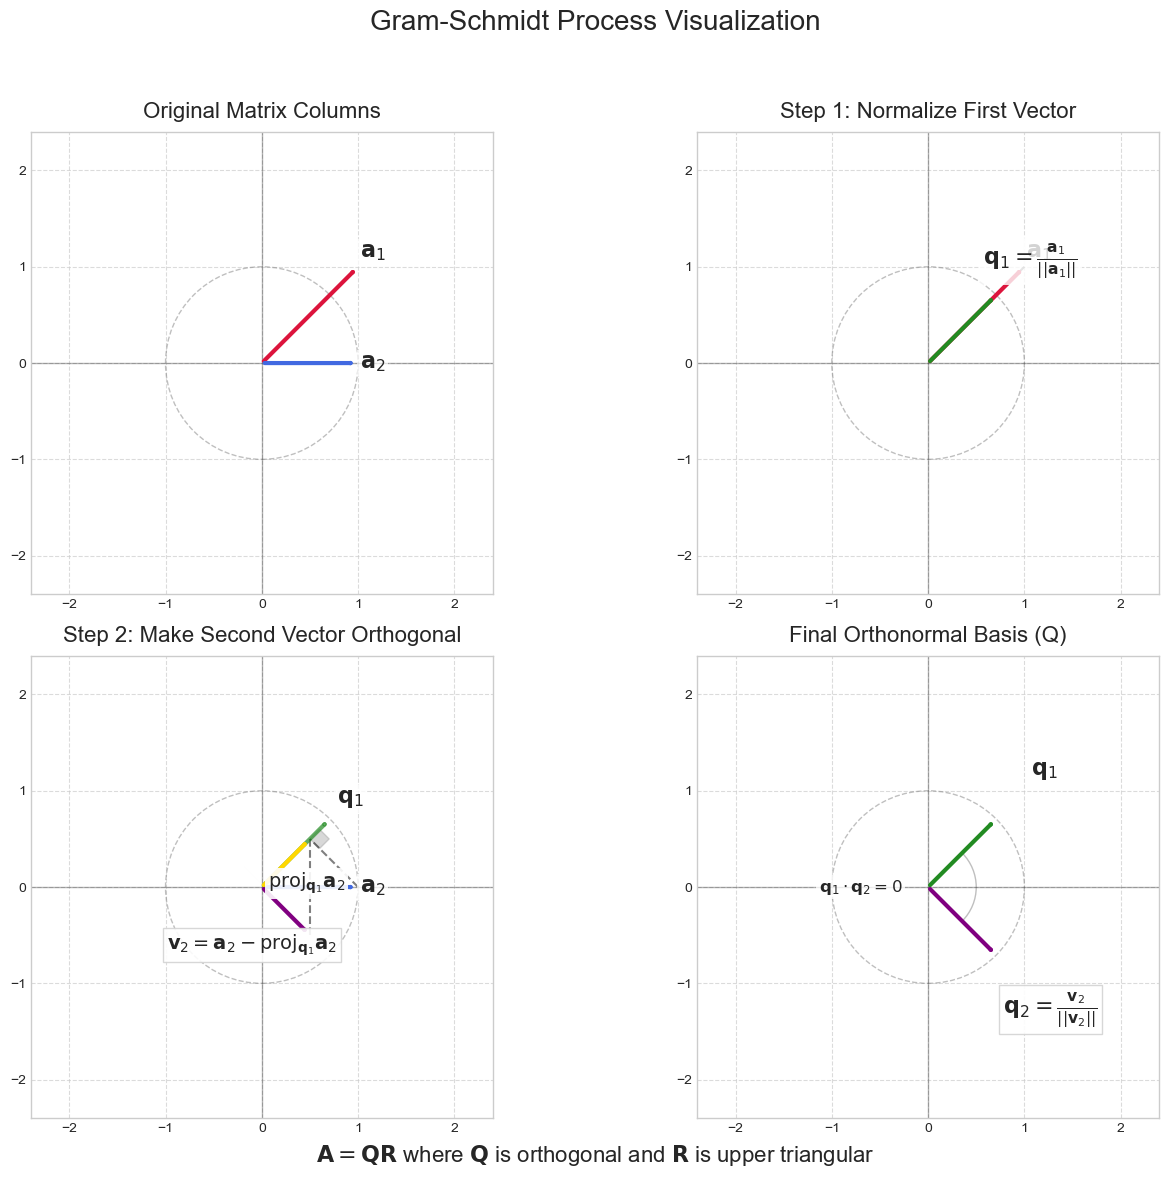

In [5]:
# Example usage with a 2x2 matrix
A = np.array([[1, 1], [1, 0]])  # You can change this to any 2x2 matrix
fig, Q, R = gram_schmidt_visualization(A)
plt.show()



--- Example 1 ---
Original Matrix A:
[[2 1]
 [1 1]]

Orthogonal Matrix Q:
[[ 0.8944 -0.4472]
 [ 0.4472  0.8944]]

Upper Triangular Matrix R:
[[2.2361 1.3416]
 [0.     0.4472]]

Verification A = QR:
[[2. 1.]
 [1. 1.]]

Verification Q^T Q = I (orthogonality):
[[1. 0.]
 [0. 1.]]


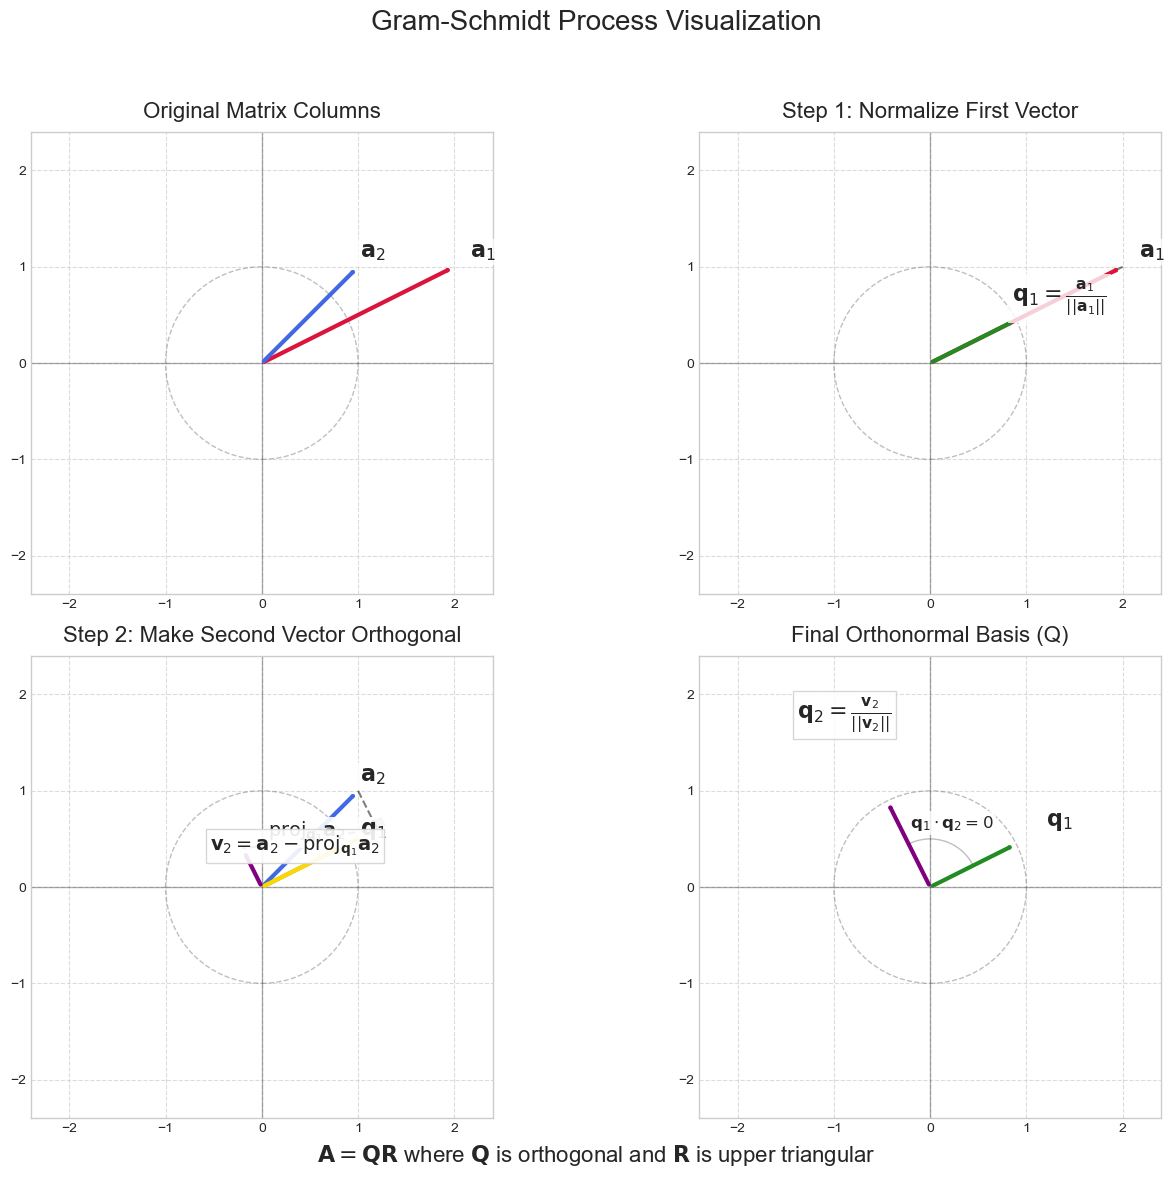



--- Example 2 ---
Original Matrix A:
[[3 1]
 [0 2]]

Orthogonal Matrix Q:
[[1. 0.]
 [0. 1.]]

Upper Triangular Matrix R:
[[3. 1.]
 [0. 2.]]

Verification A = QR:
[[3. 1.]
 [0. 2.]]

Verification Q^T Q = I (orthogonality):
[[1. 0.]
 [0. 1.]]


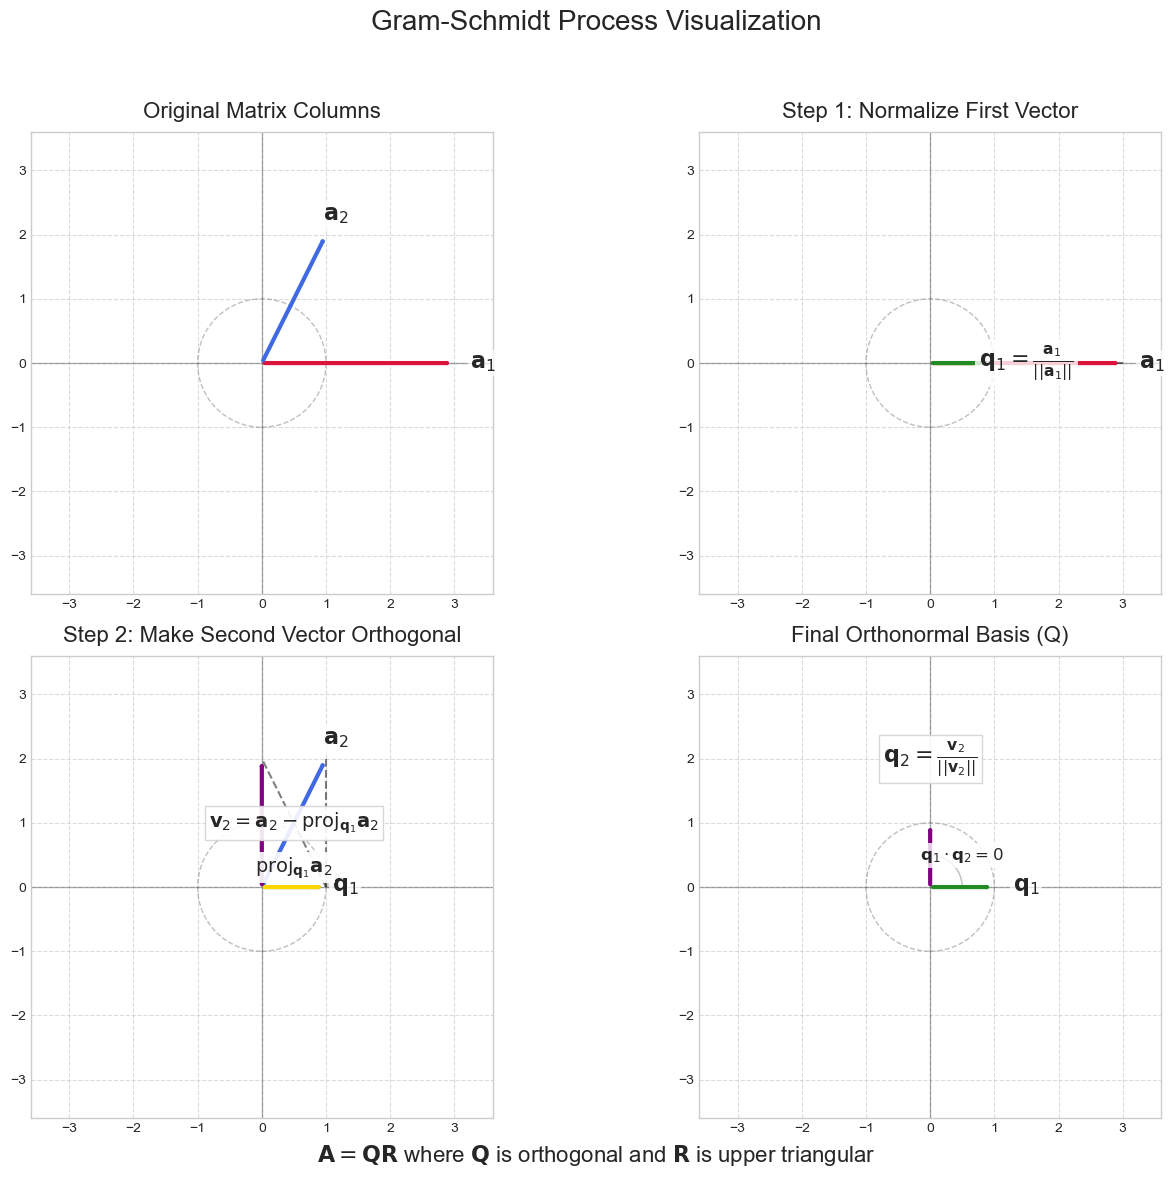



--- Example 3 ---
Original Matrix A:
[[ 0 -1]
 [ 1  0]]

Orthogonal Matrix Q:
[[ 0. -1.]
 [ 1.  0.]]

Upper Triangular Matrix R:
[[1. 0.]
 [0. 1.]]

Verification A = QR:
[[ 0. -1.]
 [ 1.  0.]]

Verification Q^T Q = I (orthogonality):
[[1. 0.]
 [0. 1.]]


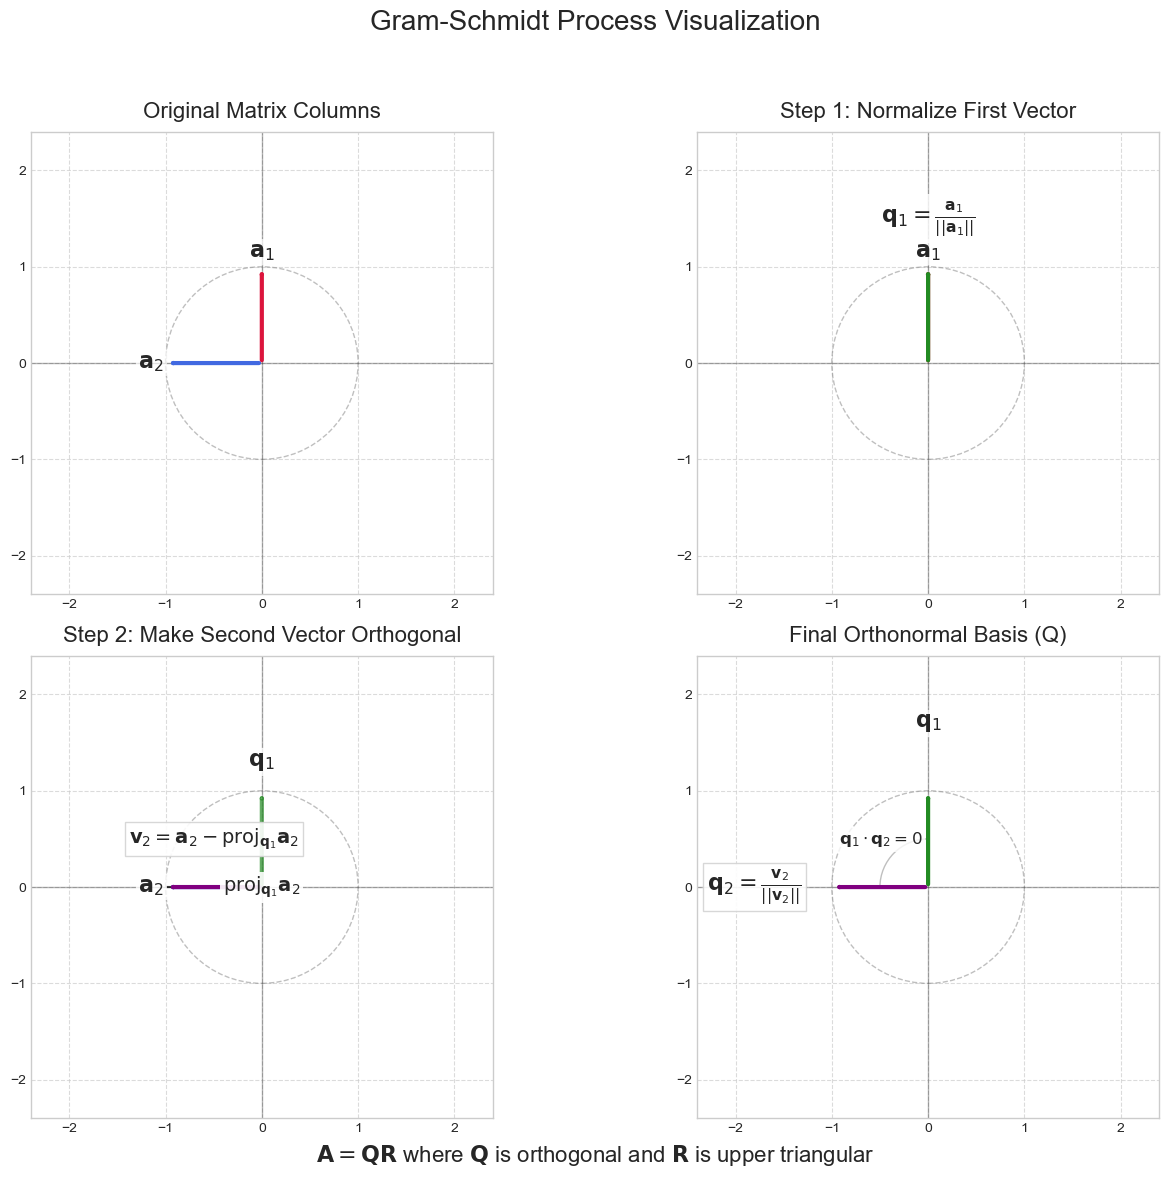



--- Example 4 ---
Original Matrix A:
[[1 2]
 [2 1]]

Orthogonal Matrix Q:
[[ 0.4472  0.8944]
 [ 0.8944 -0.4472]]

Upper Triangular Matrix R:
[[2.2361 1.7889]
 [0.     1.3416]]

Verification A = QR:
[[1. 2.]
 [2. 1.]]

Verification Q^T Q = I (orthogonality):
[[1. 0.]
 [0. 1.]]


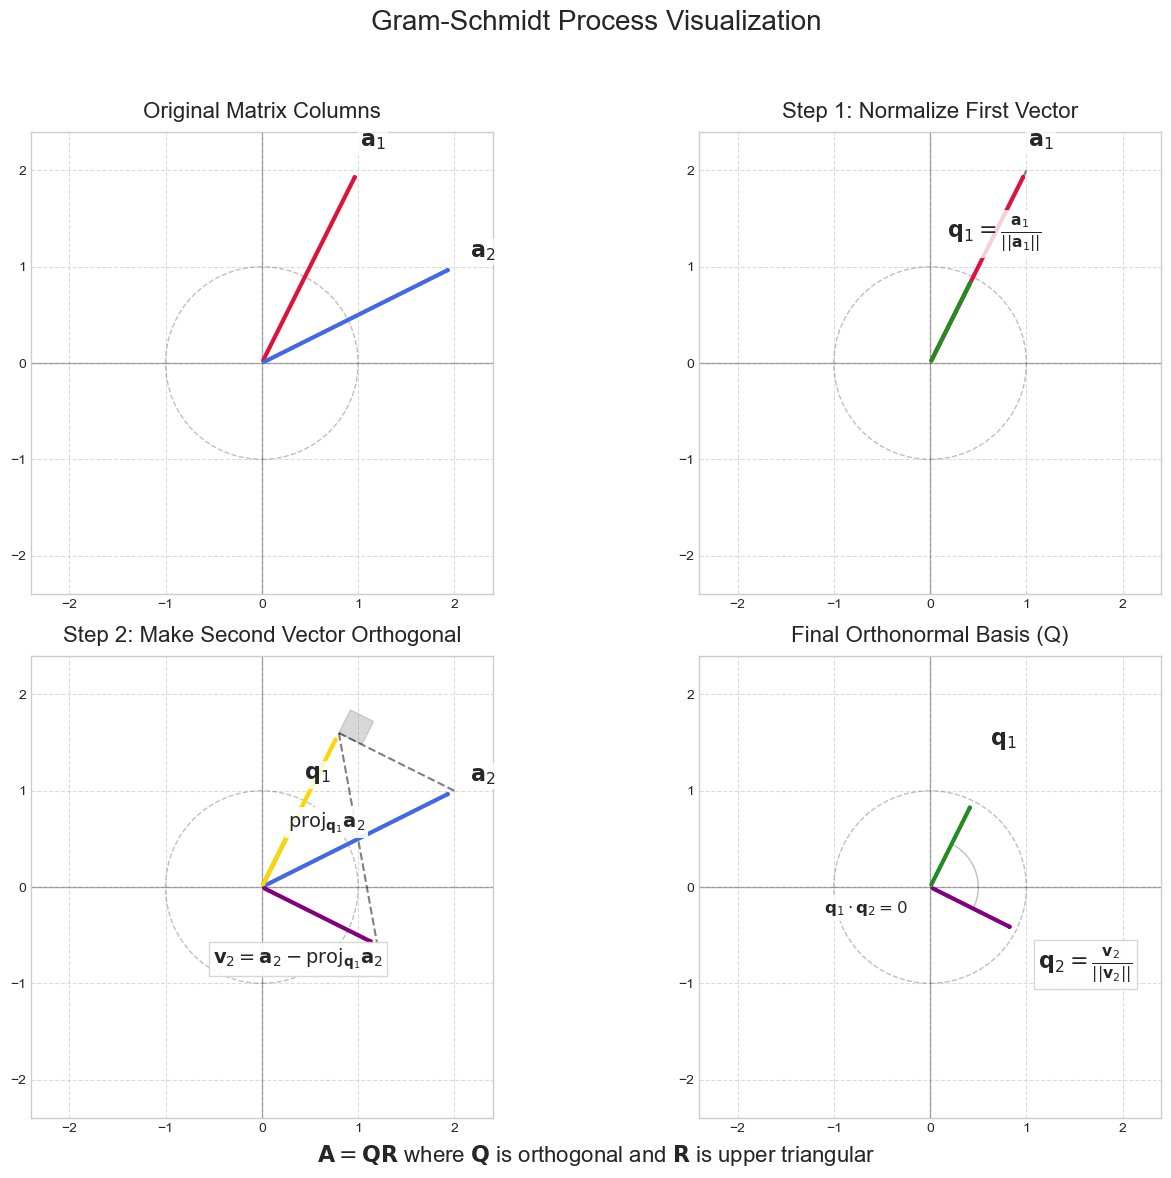

In [6]:
# Some other interesting matrices to try
matrices = [
    np.array([[2, 1], [1, 1]]),      # A matrix with non-orthogonal columns
    np.array([[3, 1], [0, 2]]),      # An upper triangular matrix
    np.array([[0, -1], [1, 0]]),     # A rotation matrix (already orthogonal)
    np.array([[1, 2], [2, 1]])       # A symmetric matrix
]

# Try each matrix
for i, A in enumerate(matrices):
    print(f"\n\n--- Example {i+1} ---")
    fig, Q, R = gram_schmidt_visualization(A)
    plt.show()

QR Decomposition Explanation:
-----------------------------
Original Matrix A:
[[2 1]
 [1 1]]

Orthogonal Matrix Q (preserves angles and distances):
[[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]

Upper Triangular Matrix R (shears and scales):
[[-2.23606798 -1.34164079]
 [ 0.          0.4472136 ]]

Verification A = QR:
[[2. 1.]
 [1. 1.]]

Geometric Interpretation:
- Q represents a rotation or reflection (orthogonal transformation)
- R represents scaling and shearing (upper triangular)
- Any matrix A can be decomposed into these two basic transformations


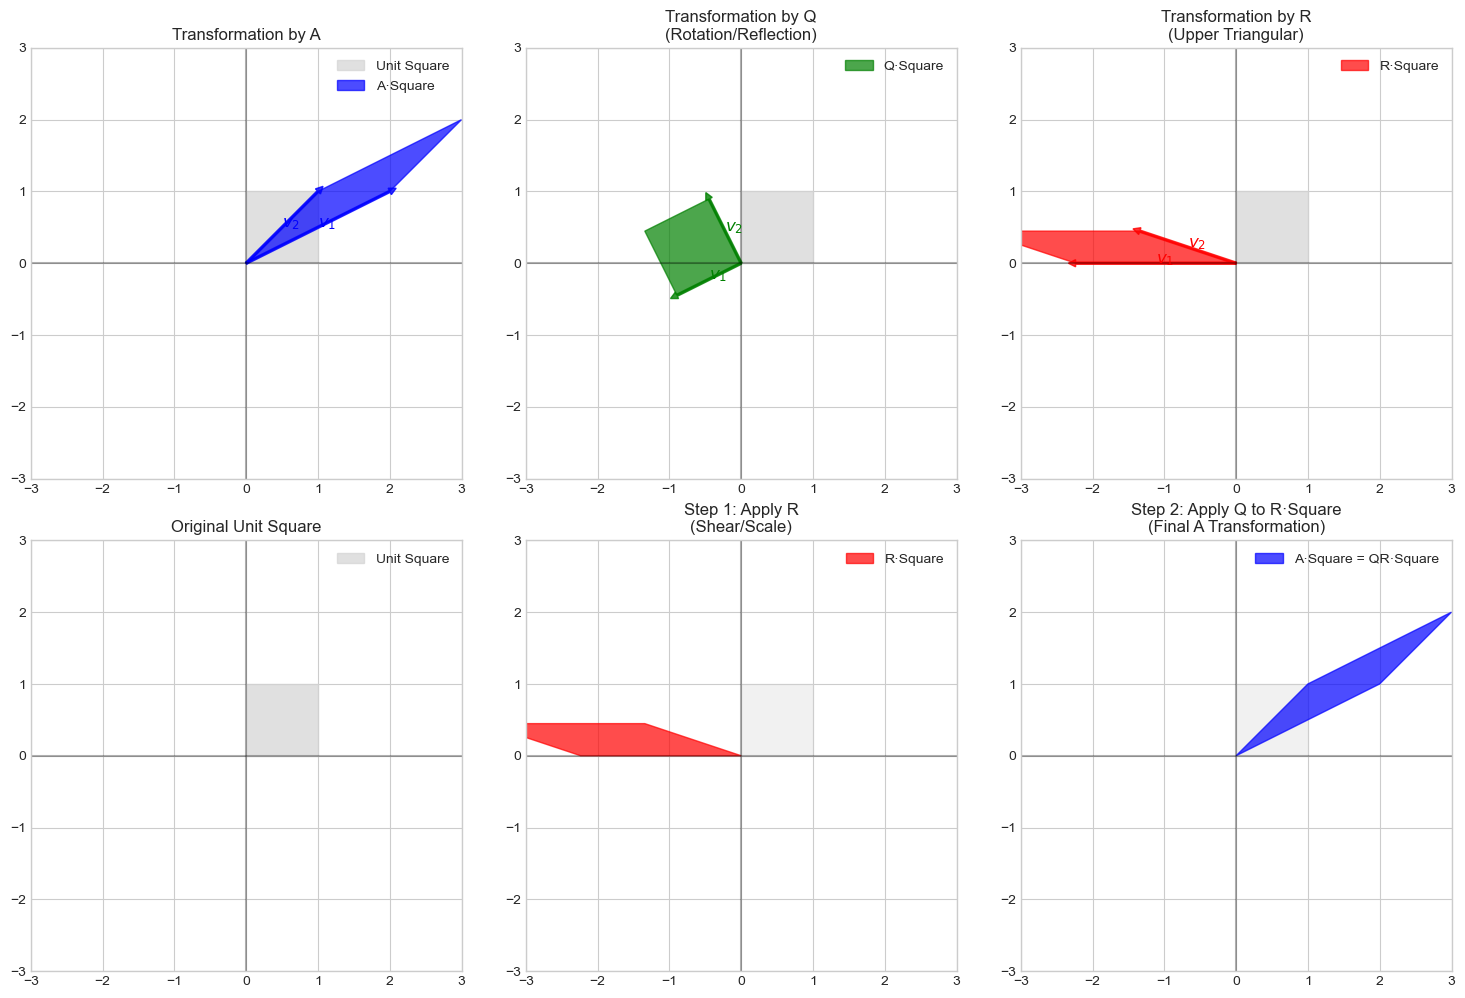

In [13]:
def plot_transformation(ax, matrix, unit_square, color='blue', alpha=0.5, label=None, draw_vectors=False):
    """Plot the transformation of the unit square by the given matrix."""
    transformed_square = np.dot(unit_square, matrix.T)
    polygon = Polygon(transformed_square, alpha=alpha, color=color, label=label)
    ax.add_patch(polygon)
    
    # Optionally draw the basis vectors
    if draw_vectors:
        # Draw transformed basis vectors
        ax.arrow(0, 0, matrix[0, 0], matrix[1, 0], head_width=0.1, head_length=0.1, 
                fc=color, ec=color, width=0.03, alpha=0.8)
        ax.arrow(0, 0, matrix[0, 1], matrix[1, 1], head_width=0.1, head_length=0.1, 
                fc=color, ec=color, width=0.03, alpha=0.8)
        
        # Add text labels for the vectors
        ax.text(matrix[0, 0]/2, matrix[1, 0]/2, f'$v_1$', fontsize=12, color=color)
        ax.text(matrix[0, 1]/2, matrix[1, 1]/2, f'$v_2$', fontsize=12, color=color)

def visualize_qr_decomposition(A):
    """Visualize how A, Q, and R transform the unit square and how A = QR."""
    # Compute QR decomposition
    Q, R = np.linalg.qr(A)
    
    # Create unit square vertices (each row is a vertex)
    unit_square = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
    
    # Create the figure with 2 rows
    fig = plt.figure(figsize=(15, 10))
    
    # First row: Individual transformations
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2)
    ax3 = fig.add_subplot(2, 3, 3)
    
    # Second row: Step-by-step transformation
    ax4 = fig.add_subplot(2, 3, 4)
    ax5 = fig.add_subplot(2, 3, 5)
    ax6 = fig.add_subplot(2, 3, 6)
    
    all_axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    
    # Set limits and grid for all subplots
    for ax in all_axes:
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.grid(True)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        ax.set_aspect('equal')
    
    # First row: Individual transformations
    # Plot original unit square and A transformation
    plot_transformation(ax1, np.eye(2), unit_square, color='lightgray', alpha=0.7, label='Unit Square')
    plot_transformation(ax1, A, unit_square, color='blue', alpha=0.7, label='A·Square', draw_vectors=True)
    ax1.set_title('Transformation by A')
    
    # Plot Q transformation
    plot_transformation(ax2, np.eye(2), unit_square, color='lightgray', alpha=0.7)
    plot_transformation(ax2, Q, unit_square, color='green', alpha=0.7, label='Q·Square', draw_vectors=True)
    ax2.set_title('Transformation by Q\n(Rotation/Reflection)')
    
    # Plot R transformation
    plot_transformation(ax3, np.eye(2), unit_square, color='lightgray', alpha=0.7)
    plot_transformation(ax3, R, unit_square, color='red', alpha=0.7, label='R·Square', draw_vectors=True)
    ax3.set_title('Transformation by R\n(Upper Triangular)')
    
    # Second row: Step-by-step transformation
    # Original square
    plot_transformation(ax4, np.eye(2), unit_square, color='lightgray', alpha=0.7, label='Unit Square')
    ax4.set_title('Original Unit Square')
    
    # First apply R
    plot_transformation(ax5, np.eye(2), unit_square, color='lightgray', alpha=0.3)
    plot_transformation(ax5, R, unit_square, color='red', alpha=0.7, label='R·Square')
    ax5.set_title('Step 1: Apply R\n(Shear/Scale)')
    
    # Then apply Q to R
    plot_transformation(ax6, np.eye(2), unit_square, color='lightgray', alpha=0.3)
    plot_transformation(ax6, A, unit_square, color='blue', alpha=0.7, label='A·Square = QR·Square')
    ax6.set_title('Step 2: Apply Q to R·Square\n(Final A Transformation)')
    
    # Add legends
    for ax in all_axes:
        ax.legend()
    
    plt.tight_layout()
    
    # Print the matrices with more explanation
    print("QR Decomposition Explanation:")
    print("-----------------------------")
    print("Original Matrix A:")
    print(A)
    print("\nOrthogonal Matrix Q (preserves angles and distances):")
    print(Q)
    print("\nUpper Triangular Matrix R (shears and scales):")
    print(R)
    print("\nVerification A = QR:")
    print(np.matmul(Q, R))
    print("\nGeometric Interpretation:")
    print("- Q represents a rotation or reflection (orthogonal transformation)")
    print("- R represents scaling and shearing (upper triangular)")
    print("- Any matrix A can be decomposed into these two basic transformations")
    
    return fig, Q, R

# Example usage with a more interesting matrix
A = np.array([[2, 1], [1, 1]])
fig, Q, R = visualize_qr_decomposition(A)
plt.show()



QR Decomposition Explanation:
-----------------------------
Original Matrix A:
[[0 2]
 [2 0]]

Orthogonal Matrix Q (preserves angles and distances):
[[ 0. -1.]
 [-1.  0.]]

Upper Triangular Matrix R (shears and scales):
[[-2.  0.]
 [ 0. -2.]]

Verification A = QR:
[[0. 2.]
 [2. 0.]]

Geometric Interpretation:
- Q represents a rotation or reflection (orthogonal transformation)
- R represents scaling and shearing (upper triangular)
- Any matrix A can be decomposed into these two basic transformations


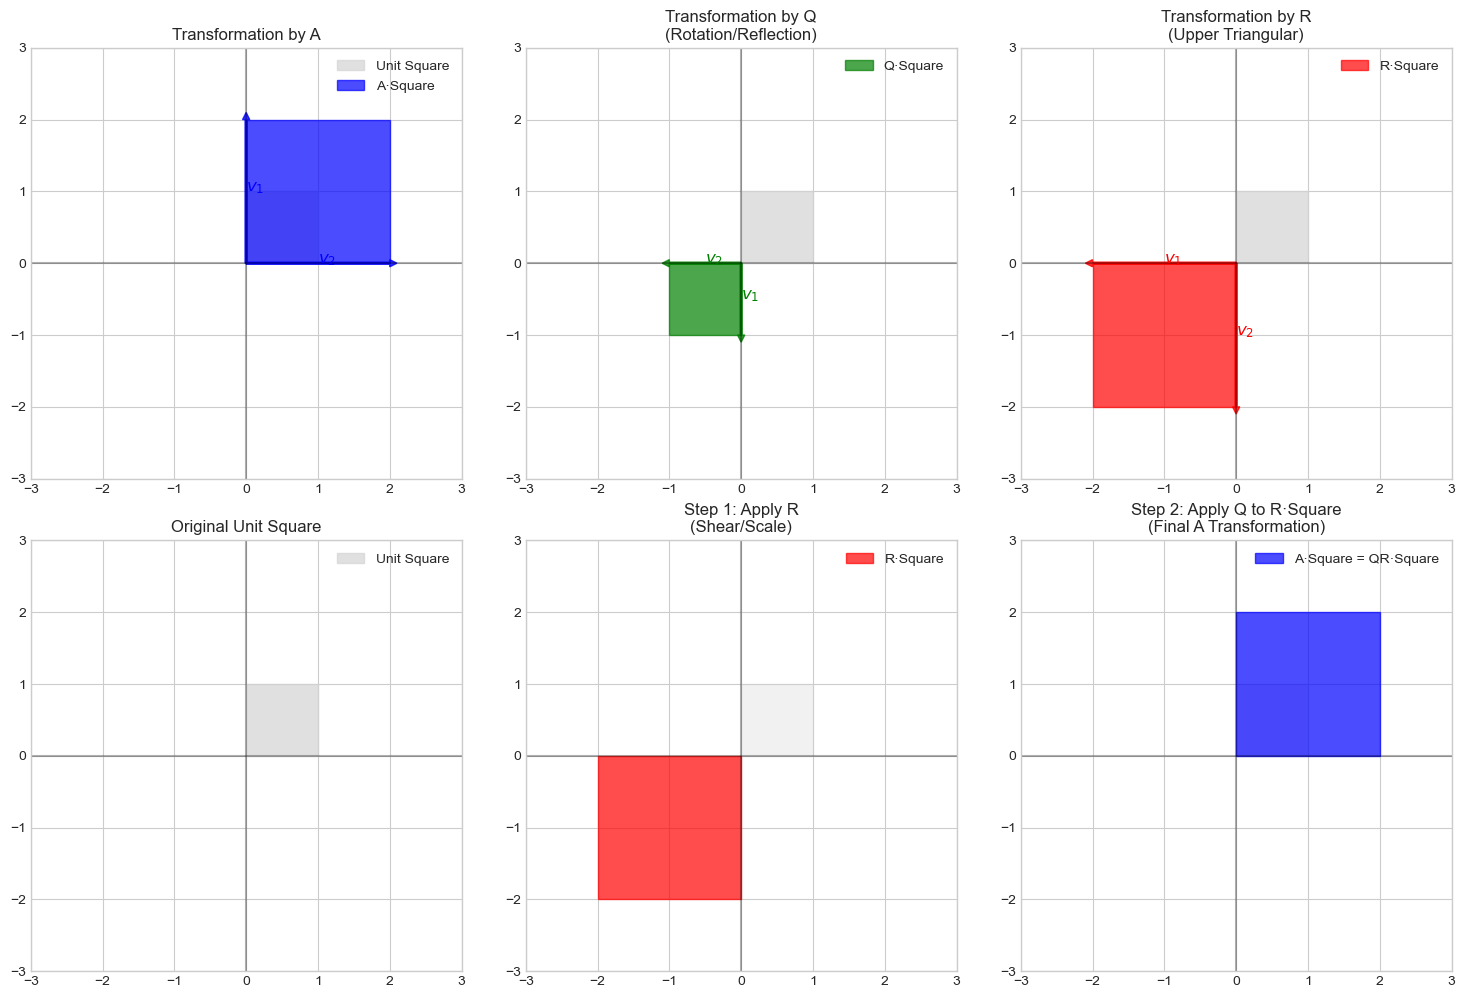

In [14]:

#A = np.array([[3, 1], [2, 2]])  # Another example
A = np.array([[0, 2], [2, 0]])  # Reflection + scaling
fig, Q, R = visualize_qr_decomposition(A)
plt.show()

QR Decomposition Explanation:
-----------------------------
Original Matrix A:
[[3 1]
 [2 2]]

Orthogonal Matrix Q (preserves angles and distances):
[[-0.83205029 -0.5547002 ]
 [-0.5547002   0.83205029]]

Upper Triangular Matrix R (shears and scales):
[[-3.60555128 -1.94145069]
 [ 0.          1.10940039]]

Verification A = QR:
[[3. 1.]
 [2. 2.]]

Geometric Interpretation:
- Q represents a rotation or reflection (orthogonal transformation)
- R represents scaling and shearing (upper triangular)
- Any matrix A can be decomposed into these two basic transformations


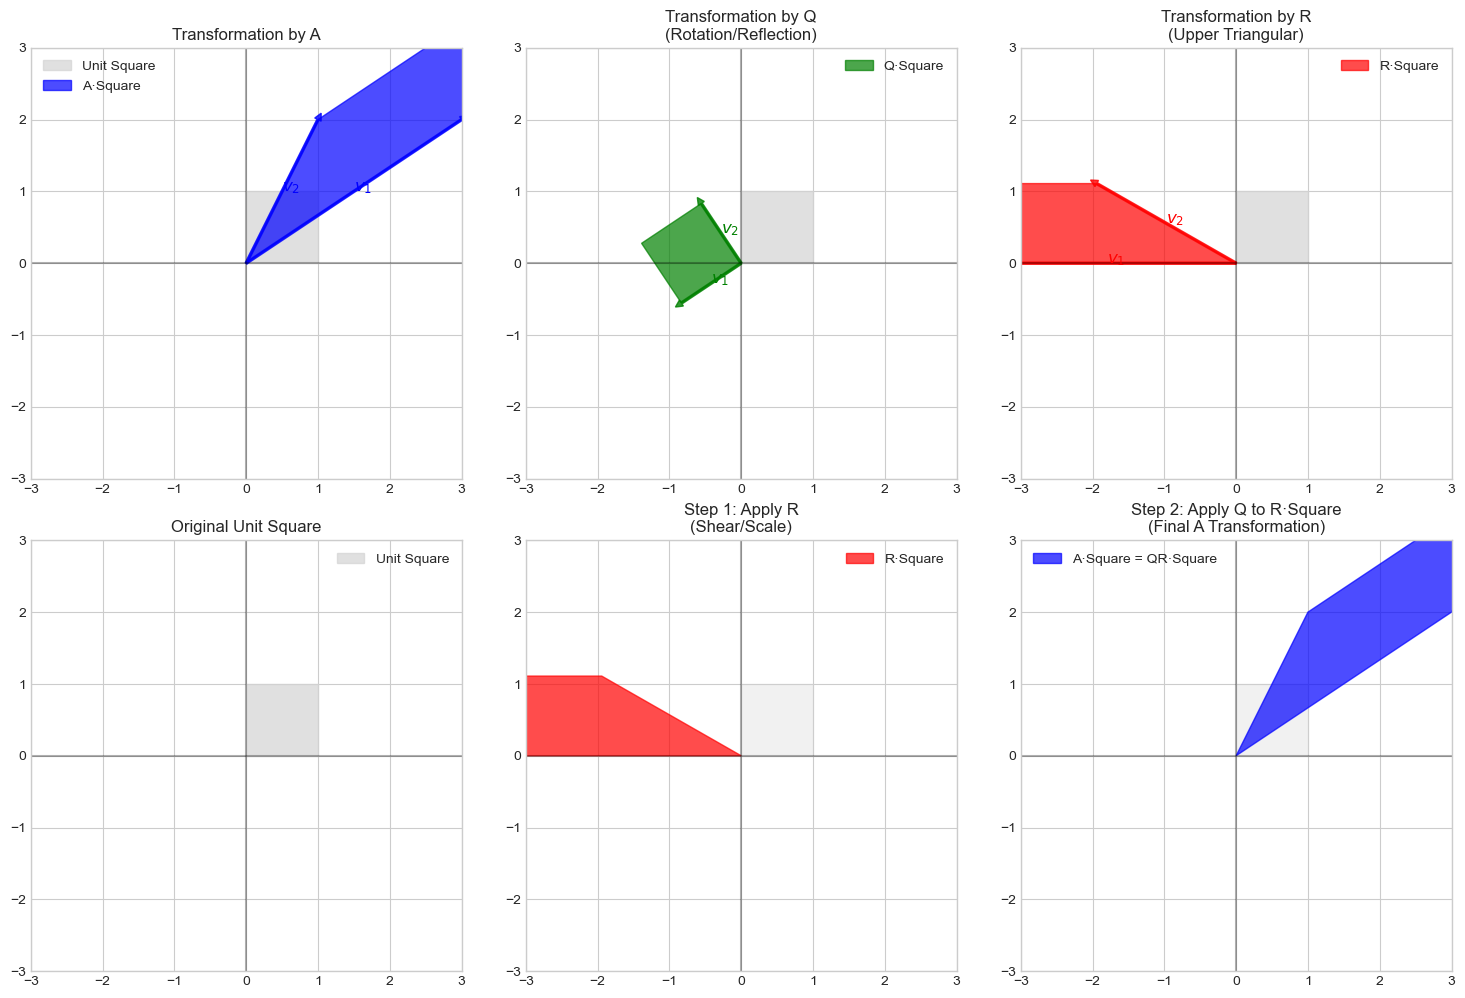

In [15]:

A = np.array([[3, 1], [2, 2]])  # Another example
fig, Q, R = visualize_qr_decomposition(A)
plt.show()